# Washing Machine Fuzzy Assignment

In [ ]:
%matplotlib inline

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


class TriangularMF:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def compute(self, x):
        if x <= self.a or x >= self.c:
            return 0.0
        elif self.a < x <= self.b:
            if self.b - self.a == 0:
                return 0.0
            return (x - self.a) / (self.b - self.a)
        else:
            if self.c - self.b == 0:
                return 0.0
            return (self.c - x) / (self.c - self.b)


In [ ]:
class FuzzyVariable:
  def __init__(self, name):
      self.name = name
      self.mf = {}

  def add_membership(self, label, mf):
      self.mf[label] = mf

  def fuzzify(self, value):
      degrees = {}
      for label, mf in self.mf.items():
          degrees[label] = mf.compute(value)
      return degrees


In [ ]:
class FuzzyRule:
  def __init__(self, antecedent1, antecedent2, consequent_label):
      self.antecedent1 = antecedent1
      self.antecedent2 = antecedent2
      self.consequent_label = consequent_label

  def evaluate(self, input1_degrees, input2_degrees):
      return min(input1_degrees[self.antecedent1],
                  input2_degrees[self.antecedent2])

In [ ]:
class FuzzyWashingMachine:
    def __init__(self):
        self._initialize_variables()
        self._initialize_rules()

    def _initialize_variables(self):
        # Input 1: Dirtiness
        self.dirtiness = FuzzyVariable("Dirtiness")
        self.dirtiness.add_membership("Low", TriangularMF(0, 0, 50))
        self.dirtiness.add_membership("Medium", TriangularMF(30, 50, 70))
        self.dirtiness.add_membership("High", TriangularMF(50, 100, 100))

        # Input 2: Load Size
        self.load_size = FuzzyVariable("Load Size")
        self.load_size.add_membership("Small", TriangularMF(0, 0, 50))
        self.load_size.add_membership("Medium", TriangularMF(30, 50, 70))
        self.load_size.add_membership("Large", TriangularMF(50, 100, 100))

        # Output: Wash Time
        self.wash_time_mf = {
            "Short": TriangularMF(0, 0, 20),
            "Medium": TriangularMF(15, 30, 45),
            "Long": TriangularMF(40, 60, 60)
        }

    def _initialize_rules(self):
        self.rules = [
            FuzzyRule("Low", "Small", "Short"),
            FuzzyRule("Low", "Medium", "Short"),
            FuzzyRule("Low", "Large", "Medium"),
            FuzzyRule("Medium", "Small", "Short"),
            FuzzyRule("Medium", "Medium", "Medium"),
            FuzzyRule("Medium", "Large", "Long"),
            FuzzyRule("High", "Small", "Medium"),
            FuzzyRule("High", "Medium", "Long"),
            FuzzyRule("High", "Large", "Long"),
        ]

    def infer(self, dirtiness_value, load_value):
        dirt_deg = self.dirtiness.fuzzify(dirtiness_value)
        load_deg = self.load_size.fuzzify(load_value)
        output_strength = {"Short": 0, "Medium": 0, "Long": 0}
        for rule in self.rules:
            strength = rule.evaluate(dirt_deg, load_deg)
            label = rule.consequent_label
            output_strength[label] = max(output_strength[label], strength)
        crisp_output = self._centroid_defuzzification(output_strength)
        label = self._get_label(crisp_output)
        return crisp_output, label

    def _centroid_defuzzification(self, output_strength):
        numerator = 0.0
        denominator = 0.0
        for t in range(0, 61):
            mu_short = min(output_strength["Short"], self.wash_time_mf["Short"].compute(t))
            mu_medium = min(output_strength["Medium"], self.wash_time_mf["Medium"].compute(t))
            mu_long = min(output_strength["Long"], self.wash_time_mf["Long"].compute(t))
            aggregated = max(mu_short, mu_medium, mu_long)
            numerator += t * aggregated
            denominator += aggregated
        return numerator / denominator if denominator != 0 else 0.0

    def _get_label(self, value):
        if value < 18: return "Short"
        elif value < 42: return "Medium"
        else: return "Long"

    def plot_membership_functions(self):
        x_input = np.arange(0, 101, 1)
        x_output = np.arange(0, 61, 1)

        # Dirtiness Plot
        plt.figure(figsize=(8, 5))
        for label, mf in self.dirtiness.mf.items():
            plt.plot(x_input, [mf.compute(x) for x in x_input], label=label, linewidth=2)
        plt.title("Dirtiness Membership Functions")
        plt.xlabel("Dirtiness")
        plt.ylabel("Membership Degree")
        plt.legend()
        plt.grid(True)
        plt.show()

        # Load Plot
        plt.figure(figsize=(8, 5))
        for label, mf in self.load_size.mf.items():
            plt.plot(x_input, [mf.compute(x) for x in x_input], label=label, linewidth=2)
        plt.title("Load Size Membership Functions")
        plt.xlabel("Load Size")
        plt.ylabel("Membership Degree")
        plt.legend()
        plt.grid(True)
        plt.show()

        # Wash Time Plot
        plt.figure(figsize=(8, 5))
        for label, mf in self.wash_time_mf.items():
            plt.plot(x_output, [mf.compute(x) for x in x_output], label=label, linewidth=2)
        plt.title("Wash Time Membership Functions")
        plt.xlabel("Wash Time (minutes)")
        plt.ylabel("Membership Degree")
        plt.legend()
        plt.grid(True)
        plt.show()


FUZZY WASHING MACHINE CONTROLLER (FIXED)
No.  Dirtiness   Load Size   Wash Time      Label
----------------------------------------------------------------------
1    20          15          7.69           Short
2    50          50          30.00          Medium
3    85          90          52.60          Long
4    30          80          30.00          Medium
5    75          30          30.00          Medium

Generating membership function plots...


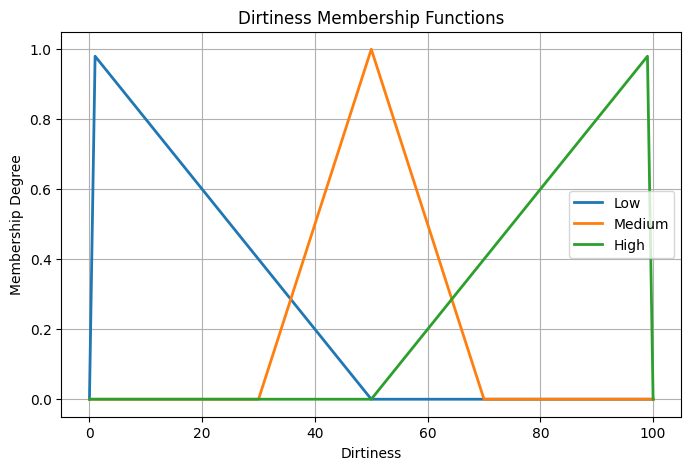

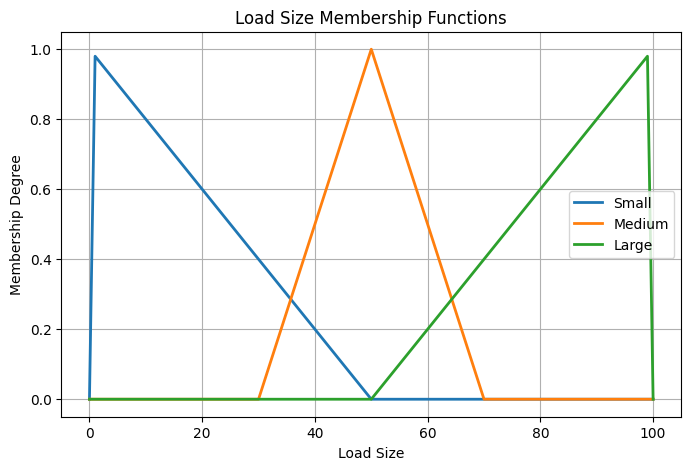

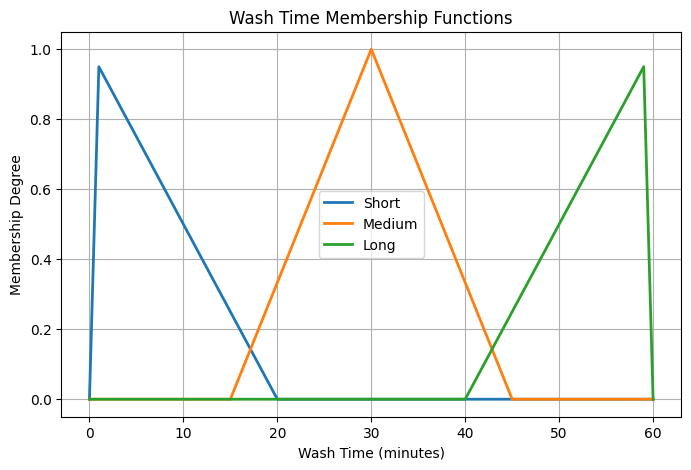

In [ ]:
if __name__ == "__main__":
    controller = FuzzyWashingMachine()

    # Display test cases
    test_cases = [
        (20, 15),
        (50, 50),
        (85, 90),
        (30, 80),
        (75, 30)
    ]
    print("=" * 70)
    print("FUZZY WASHING MACHINE CONTROLLER (FIXED)")
    print("=" * 70)
    print(f"{'No.':<5}{'Dirtiness':<12}{'Load Size':<12}{'Wash Time':<15}{'Label'}")
    print("-" * 70)
    for i, (d, l) in enumerate(test_cases, 1):
        output, label = controller.infer(d, l)
        print(f"{i:<5}{d:<12}{l:<12}{output:<15.2f}{label}")
    print("=" * 70)

    # Plot membership functions
    print("\nGenerating membership function plots...")
    controller.plot_membership_functions()


# Restaurant Fuzzy Lab Impementation

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


class TriangularMF:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def compute(self, x):
        if x <= self.a or x >= self.c:
            return 0.0
        elif self.a < x <= self.b:
            if self.b - self.a == 0:
                return 0.0
            return (x - self.a) / (self.b - self.a)
        else:
            if self.c - self.b == 0:
                return 0.0
            return (self.c - x) / (self.c - self.b)

class TrapezoidalMF:
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def compute(self, x):
        if x <= self.a or x >= self.d:
            return 0.0
        elif self.a < x <= self.b:
            if self.b - self.a == 0:
                return 0.0
            return (x - self.a) / (self.b - self.a)
        elif self.b < x <= self.c:
            return 1.0
        else:
            if self.d - self.c == 0:
                return 0.0
            return (self.d - x) / (self.d - self.c)



class FuzzyVariable:
    def __init__(self, name):
        self.name = name
        self.mf = {}
        self.universe = None

    def set_universe(self, start, end, step):
        self.universe = np.arange(start, end+step, step)

    def add_mf(self, label, mf):
        self.mf[label] = mf

    def fuzzify(self, value):
        return {label: mf.compute(value) for label, mf in self.mf.items()}



class FuzzyRule:
    def __init__(self, service_label=None, food_label=None, tip_label=None, op="OR"):
        self.service_label = service_label
        self.food_label = food_label
        self.tip_label = tip_label
        self.op = op  # 'AND' or 'OR'

    def evaluate(self, service_deg, food_deg):
        s = service_deg[self.service_label] if self.service_label else 0
        f = food_deg[self.food_label] if self.food_label else 0
        if self.op == "AND":
            return min(s, f)
        else:
            return max(s, f)




In [ ]:
class FuzzyTipCalculator:
    def __init__(self):
        self._initialize_variables()
        self._initialize_rules()

    def _initialize_variables(self):
        # Service (0-10)
        self.service = FuzzyVariable("Service")
        self.service.set_universe(0,10,1)
        self.service.add_mf("Poor", TrapezoidalMF(0,0,2,4))
        self.service.add_mf("Good", TriangularMF(2,5,8))
        self.service.add_mf("Excellent", TrapezoidalMF(6,8,10,10))

        # Food (0-10)
        self.food = FuzzyVariable("Food")
        self.food.set_universe(0,10,1)
        self.food.add_mf("Bad", TrapezoidalMF(0,0,3,7))
        self.food.add_mf("Delicious", TrapezoidalMF(3,7,10,10))

        # Tip (5-25%)
        self.tip = FuzzyVariable("Tip")
        self.tip.set_universe(5,25,1)
        self.tip.add_mf("Cheap", TrapezoidalMF(5,5,10,13))
        self.tip.add_mf("Average", TriangularMF(10,15,20))
        self.tip.add_mf("Generous", TrapezoidalMF(17,20,25,25))

    def _initialize_rules(self):
        self.rules = [
            FuzzyRule("Poor","Bad","Cheap","OR"),
            FuzzyRule("Good",None,"Average","OR"),
            FuzzyRule("Excellent","Delicious","Generous","OR")
        ]

    def infer(self, service_val, food_val):
        service_deg = self.service.fuzzify(service_val)
        food_deg = self.food.fuzzify(food_val)
        tip_strength = {"Cheap":0,"Average":0,"Generous":0}
        for rule in self.rules:
            strength = rule.evaluate(service_deg, food_deg)
            tip_strength[rule.tip_label] = max(tip_strength[rule.tip_label], strength)

        numerator = 0
        denominator = 0
        for t in self.tip.universe:
            mu_cheap = min(tip_strength["Cheap"], self.tip.mf["Cheap"].compute(t))
            mu_average = min(tip_strength["Average"], self.tip.mf["Average"].compute(t))
            mu_generous = min(tip_strength["Generous"], self.tip.mf["Generous"].compute(t))
            aggregated = max(mu_cheap, mu_average, mu_generous)
            numerator += t * aggregated
            denominator += aggregated
        tip_crisp = numerator/denominator if denominator!=0 else 0

        if tip_crisp < 13: label = "Cheap"
        elif tip_crisp < 20: label = "Average"
        else: label = "Generous"
        return tip_crisp, label

    def plot_mfs(self, service_val=None, food_val=None):
        fig, axes = plt.subplots(1, 3, figsize=(18, 4))
        # Service
        for label, mf in self.service.mf.items():
            axes[0].plot(self.service.universe, [mf.compute(x) for x in self.service.universe], label=label)
        if service_val is not None: axes[0].axvline(service_val, color='k', linestyle='--')
        axes[0].set_title("Service"); axes[0].legend()

        # Food
        for label, mf in self.food.mf.items():
            axes[1].plot(self.food.universe, [mf.compute(x) for x in self.food.universe], label=label)
        if food_val is not None: axes[1].axvline(food_val, color='k', linestyle='--')
        axes[1].set_title("Food"); axes[1].legend()

        # Tip
        for label, mf in self.tip.mf.items():
            axes[2].plot(self.tip.universe, [mf.compute(x) for x in self.tip.universe], label=label)
        axes[2].set_title("Tip"); axes[2].legend()
        plt.show()

In [ ]:
calculator = FuzzyTipCalculator()

def update_tip(service_val, food_val):
    tip_val, tip_label = calculator.infer(service_val, food_val)
    print(f"Service = {service_val}, Food = {food_val} → Tip = {tip_val:.2f}% ({tip_label})")
    calculator.plot_mfs(service_val, food_val)

widgets.interact(update_tip,
                 service_val=widgets.IntSlider(min=0,max=10,step=1,value=5,description="Service"),
                 food_val=widgets.IntSlider(min=0,max=10,step=1,value=5,description="Food"))

interactive(children=(IntSlider(value=5, description='Service', max=10), IntSlider(value=5, description='Food'…

<function __main__.update_tip(service_val, food_val)>